In [8]:
import json
import matplotlib.pyplot as plt

In [9]:
with open("building.geojson", "r") as read_file:
    building = json.load(read_file)['features'][0]['geometry']['coordinates'][0][0]

In [10]:
with open("walk_paths.geojson", "r") as read_file:
    paths = []
    for feature in json.load(read_file)['features']:
        paths.append(feature['geometry']['coordinates'][0])

In [11]:
with open("points.geojson", "r") as read_file:
    points = []
    for feature in json.load(read_file)['features']:
        points.append(feature['geometry']['coordinates'])

In [12]:
def convert(polygon, paths, points, w, h):
    pl = []
    ptl = []
    
    xl = []
    yl = []

    for p in polygon:
        x = 1 * (180 + p[1]) / 360
        y = 1 * (90 + p[0]) / 180

        xl.append(x)
        yl.append(y)
    
    # bounding box
    x_min = min(xl)
    x_max = max(xl)
    y_min = min(yl)
    y_max = max(yl)
    
    x_ratio = h / (x_max - x_min)
    y_ratio = w / (y_max - y_min)
    
    for i in range(len(xl)):
        xl[i] -= x_min
        yl[i] -= y_min
        
        xl[i] *= x_ratio
        yl[i] *= y_ratio
    
    polygon = [xl, yl]
    
    for path in paths:
        xl = []
        yl = []
        for p in path:
            x = 1 * (180 + p[1]) / 360
            y = 1 * (90 + p[0]) / 180
            
            x -= x_min
            y -= y_min
            x *= x_ratio
            y *= y_ratio
            
            xl.append(x)
            yl.append(y)  
        
        pl.append([xl, yl])

    for point in points:
        x = 1 * (180 + point[1]) / 360
        y = 1 * (90 + point[0]) / 180

        x -= x_min
        y -= y_min
        x *= x_ratio
        y *= y_ratio 
        
        ptl.append([x, y])
    
    return { "width": w, "height": h, "polygon": polygon, "paths": pl, "points": ptl }

In [23]:
def draw(shape):
    fig, ax = plt.subplots()
    ax.imshow(plt.imread("bg.png"), extent = [0, shape['width'], 0, shape['height']])
    ax.plot(shape['polygon'][1], shape['polygon'][0], linewidth = 3)
    
    for p in shape['paths']:
        ax.plot(p[1], p[0], linewidth = 3)
    
    for p in shape['points']:
        plt.scatter([p[1]], [p[0]])

In [24]:
def save_building(building, filename):
    result = "LINESTRING ("

    size = len(building[0])
    for i in range(size):
        if (i != size - 1):
            result += str(building[1][i]) + " " + str(building[0][i]) + ", "
        else:
            result += str(building[1][i]) + " " + str(building[0][i]) + ")"
    
    f = open(filename, "w")
    f.write(result)
    f.close()

In [25]:
def save_paths(paths, filename):
    result = ""
    
    for path in paths:
        result += "LINESTRING ("

        size = len(path[0])
        for i in range(size):
            if (i != size - 1):
                result += str(path[1][i]) + " " + str(path[0][i]) + ", "
            else:
                result += str(path[1][i]) + " " + str(path[0][i]) + ")" + "\n\n"
    
    f = open(filename, "w")
    f.write(result)
    f.close()

In [29]:
def save_points(points, filename):
    result = ""
    
    for point in points:
        result += "POINT (" + str(point[1]) + " " + str(point[0]) + ")" + "\n\n"         
    
    f = open(filename, "w")
    f.write(result)
    f.close()

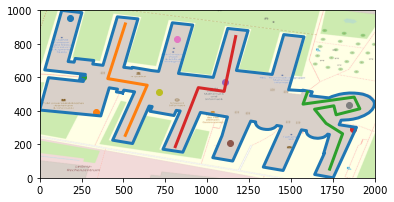

In [30]:
shape = convert(building, paths, points, 2000, 1000)
draw(shape)

In [31]:
save_building(shape['polygon'], 'building.wkt')

In [32]:
save_paths(shape['paths'], 'paths.wkt')

In [33]:
save_points(shape['points'], 'points.wkt')